In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("/Users/saujanyathapaliya/Downloads/heart.csv")

In [26]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


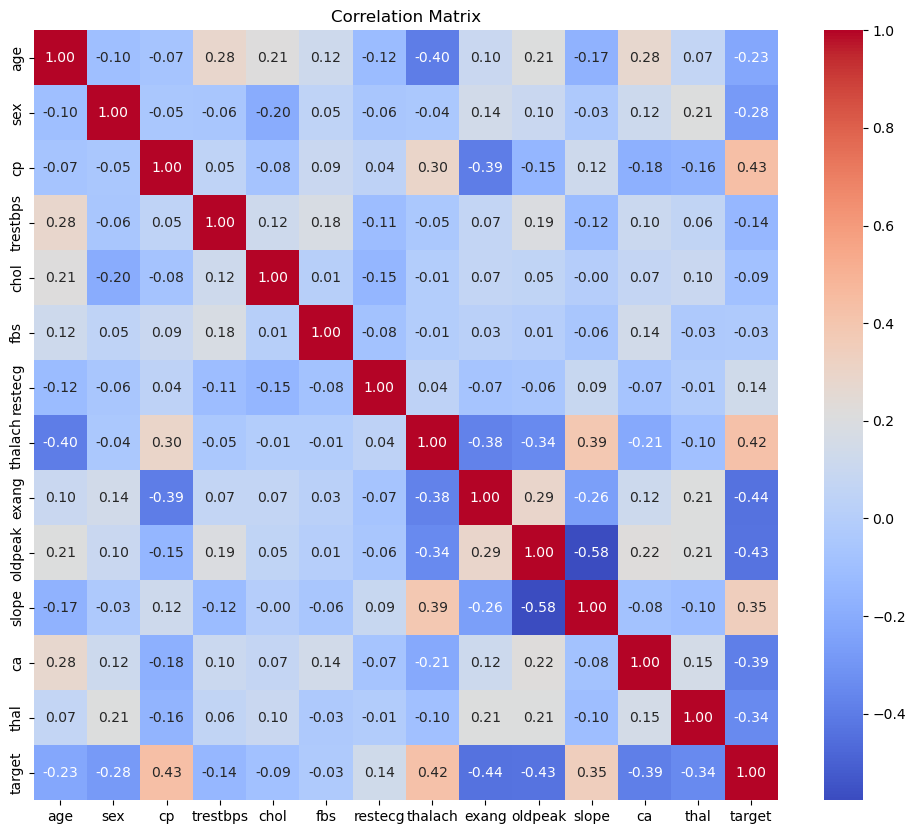

In [27]:
corr_matrix = df.corr()

# Plotting the correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [4]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle

# Example: Assume df is your DataFrame and 'target' is your outcome variable
features = ['age', 'trestbps', 'restecg', 'thalach','chol']
target = 'target'  # Replace with your actual target column name

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=54)

# Preprocessing pipeline:
# Let's assume 'sex' and 'restecg' are categorical, and the rest are numerical.
numeric_features = ['age', 'trestbps', 'thalach', 'chol']
categorical_features = ['restecg']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline that first transforms the data then fits a logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)


# Save the trained pipeline as a pickle file
with open('/Users/saujanyathapaliya/Documents/project/heart-pred/heart-model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
    
print("Model has been saved.")

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

Model has been saved.
              precision    recall  f1-score   support

           0       0.85      0.50      0.63        46
           1       0.64      0.91      0.75        45

    accuracy                           0.70        91
   macro avg       0.75      0.71      0.69        91
weighted avg       0.75      0.70      0.69        91



In [40]:
df2 = pd.read_csv("/Users/saujanyathapaliya/Downloads/human_vital_signs_dataset_2024.csv")

In [44]:
df2.head()

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [43]:
df2.columns

Index(['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp',
       'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)',
       'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI',
       'Derived_MAP', 'Risk Category'],
      dtype='object')

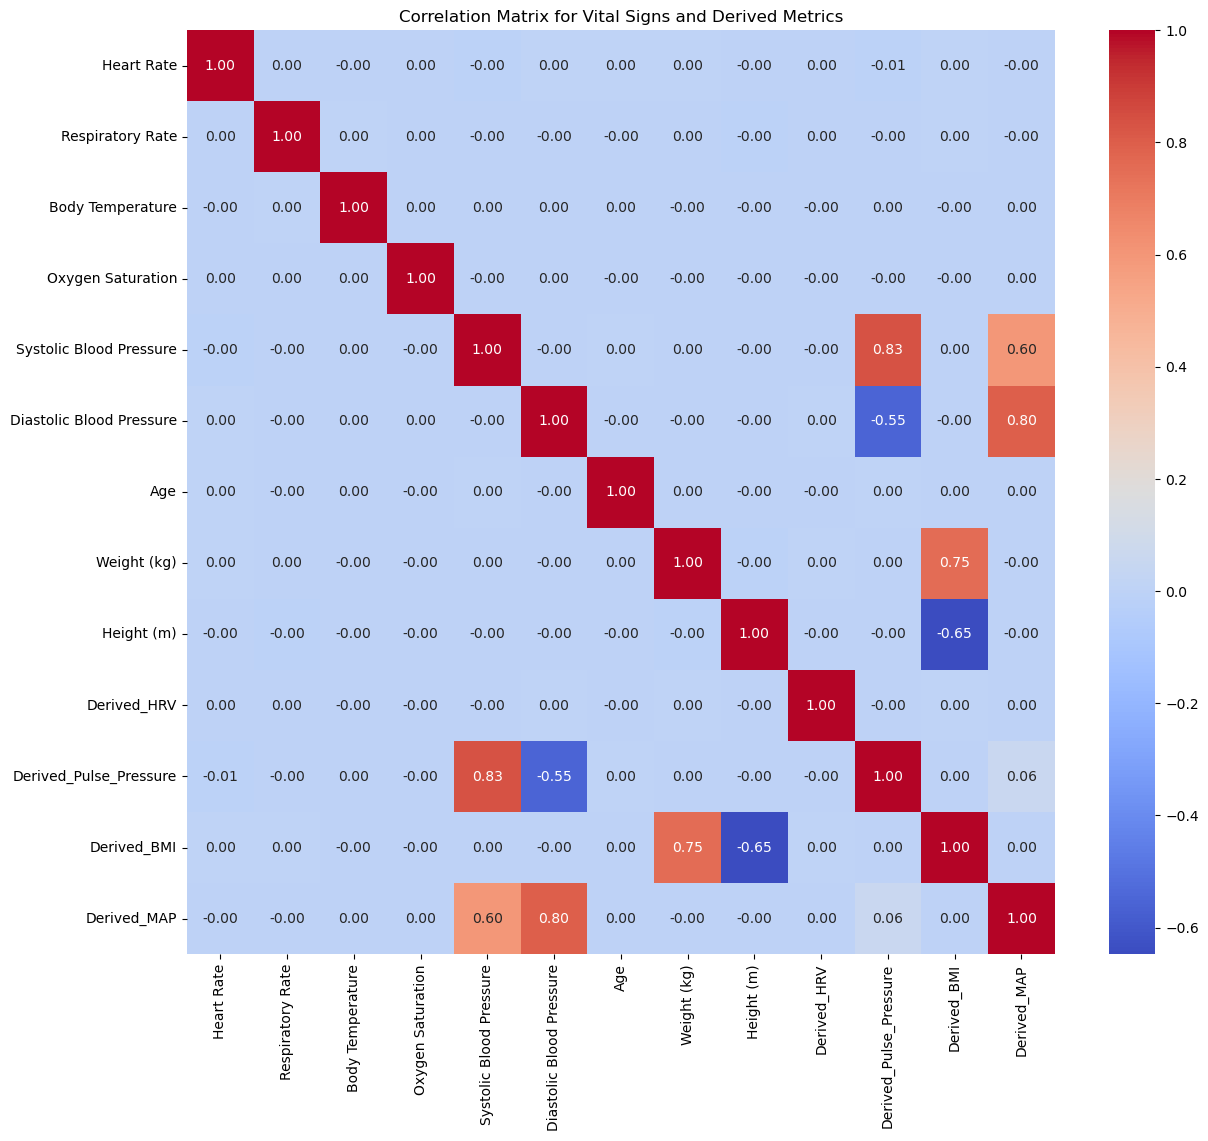

In [45]:
# Convert the Timestamp column to datetime
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

# Define the numeric columns to include in the correlation matrix.
# Exclude columns like 'Patient ID', 'Timestamp', 'Gender', and 'Risk Category'
numeric_cols = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation',
                'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)',
                'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']

# Compute the correlation matrix using Pearson's correlation coefficient
corr_matrix = df2[numeric_cols].corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Vital Signs and Derived Metrics")
plt.show()


In [46]:
corr_matrix

,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP
Heart Rate,1.000000,0.000277,-0.000500,0.001138,-0.004381,0.002931,0.004590,0.003053,-0.002049,0.000115,-0.005266,0.002974,-0.000290
Respiratory Rate,0.000277,1.000000,0.003487,0.001931,-0.000452,-0.000606,-0.001701,0.002074,-0.003889,0.000542,-0.000041,0.003352,-0.000757
Body Temperature,-0.000500,0.003487,1.000000,0.000209,0.001964,0.000021,0.001911,-0.002921,-0.000064,-0.003742,0.001623,-0.001809,0.001198
Oxygen Saturation,0.001138,0.001931,0.000209,1.000000,-0.000007,0.000860,-0.001625,-0.002332,-0.000065,-0.002514,-0.000481,-0.001564,0.000684
Systolic Blood Pressure,-0.004381,-0.000452,0.001964,-0.000007,1.000000,-0.001748,0.004012,0.000067,-0.003197,-0.001193,0.832970,0.002411,0.600043
Diastolic Blood Pressure,0.002931,-0.000606,0.000021,0.000860,-0.001748,1.000000,-0.001010,-0.000934,-0.000967,0.002993,-0.554773,-0.000254,0.798918
Age,0.004590,-0.001701,0.001911,-0.001625,0.004012,-0.001010,1.000000,0.000097,-0.000974,-0.001756,0.003897,0.000671,0.001605
Weight (kg),0.003053,0.002074,-0.002921,-0.002332,0.000067,-0.000934,0.000097,1.000000,-0.004865,0.003138,0.000572,0.751576,-0.000707
Height (m),-0.002049,-0.003889,-0.000064,-0.000065,-0.003197,-0.000967,-0.000974,-0.004865,1.000000,-0.001940,-0.002125,-0.647285,-0.002696
Derived_HRV,0.000115,0.000542,-0.003742,-0.002514,-0.001193,0.002993,-0.001756,0.003138,-0.001940,1.000000,-0.002648,0.003703,0.001677


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pickle

# Convert Timestamp to datetime
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

# Define features and target.
# We remove 'Patient ID' and 'Timestamp' as they are identifiers or not useful for prediction.
features = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation',
            'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Gender',
            'Weight (kg)', 'Height (m)']
target = 'Risk Category'

# First split: separate out the test set (20% of the data)
X_train_val, X_test, y_train_val, y_test = train_test_split(df2[features], df2[target],
                                                           test_size=0.2, random_state=42)

# Second split: split train+validation into training (60% overall) and validation (20% overall)
# Since X_train_val is 80% of the data, setting test_size=0.25 gives 0.25*80% = 20% for validation.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.25, random_state=42)

# Define which features are numeric and which are categorical.
numeric_features = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation',
                    'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age',
                    'Weight (kg)', 'Height (m)']
categorical_features = ['Gender']

# Create a preprocessor that scales numeric features and one-hot encodes categorical ones.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline that first transforms the data then fits a Decision Tree classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model on the training set
pipeline.fit(X_train, y_train)
# Evaluate the model on the validation set
y_val_pred = pipeline.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

# Optionally, save the trained pipeline as a pickle file
with open('/Users/saujanyathapaliya/Documents/project/heart-pred/vitals-model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
print("Model has been saved to heart-risk-model.pkl")

Validation Set Performance:
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     20947
    Low Risk       1.00      0.99      1.00     19057

    accuracy                           1.00     40004
   macro avg       1.00      1.00      1.00     40004
weighted avg       1.00      1.00      1.00     40004

Test Set Performance:
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     20949
    Low Risk       1.00      1.00      1.00     19055

    accuracy                           1.00     40004
   macro avg       1.00      1.00      1.00     40004
weighted avg       1.00      1.00      1.00     40004

Model has been saved to heart-risk-model.pkl


In [50]:
from sklearn.svm import SVC
features = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation',
            'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Gender',
            'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure',
            'Derived_BMI', 'Derived_MAP']
target = 'Risk Category'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2[target], 
                                                    test_size=0.5, random_state=42)

# Define which features are numeric and which are categorical.
numeric_features = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation',
                    'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age',
                    'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure',
                    'Derived_BMI', 'Derived_MAP']
categorical_features = ['Gender']

# Create a preprocessor that scales numeric features and one-hot encodes categorical ones.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline that first transforms the data then fits an SVM classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   High Risk       0.97      0.97      0.97     52503
    Low Risk       0.96      0.96      0.96     47507

    accuracy                           0.97    100010
   macro avg       0.97      0.97      0.97    100010
weighted avg       0.97      0.97      0.97    100010

